<a id = 'intro'></a>

## 1. Introduction

#### This IBM sample dataset has information about Telco customers and if they left the company within the last month (churn). Each row represents a unique costumer, while the columns contains information about customer’s services, account and demographic data




[back to top](#toc)

<a id="table_of_contents"></a>
### Table of Contents

1. [Introduction](#intro)
    * 1.1 [Problem Statement](#problem_statement)
    * 1.2 [Data Gathering](#data_gathering)
2. [Setup](#setup)
    * 2.1 [Importing the Data](#import)
3. [General](#general)
    * 3.1 [Shape](#shape)
    * 3.2 [Statistics](#stats)
    * 3.3 [Hygiene](#hygiene)
4. [Data Cleaning](#data_cleaning)
    * 4.1 [Completing](#completing)
    * 4.2 [Correcting](#correcting)
    * 4.3 [Creating](#creating)
    * 4.4 [Converting](#converting)
5. [Exploratory Data Analysis](#eda)
    * 5.1 [Continuous Features EDA](#continuous_eda)
    * 5.2 [Categorical Features EDA](#categorical_eda)
    * 5.3 [Variable Encoding](#var_encode)
    * 5.4 [Correlations](#correlations)
6. [Importance Scores](#importance)
    * 6.1 [Logistic Regression](#lr)
    * 6.2 [Decision Tree](#dt)
7. [Modelling](#tuning)
    * 7.1 [Gradient Boosted Model](#gb)
    * 7.2 [Random Forest Model](#rf)
    * 7.3 [RF with RFE](#rfe)
8. [Conclusion](#conclusion)

<a id = 'problem_statement'></a>
## 1.1 Problem Statement

#### Given some characteristics about the customer, are we able to predict whether or not the customer is likely to churn?

#### Basic information about the dataset:

* 7043 rows
* There are 21 variables, with each row representing a unique customer accountid

[back to top](#toc)

<a id = 'data_gathering'></a> 

## 1.2 Data Gathering

#### The dataset in question contains customer records of: 

* Customer churn: defined as customers who left within the last month
* Demographic info about customers: gender, age, partners, dependents
* Account information: tenure, contract period, payment method, billing, charges
* Subscribed services: phones, internet, support services such as tech support, streaming 

A copy of the dataset can be found [here](https://github.com/csanry/machinelearning/blob/main/telco_churn_classification/DATA/telco-churn.csv)


[back to top](#toc)

<a id = 'setup'></a>

## 2. Setup

#### Packages required
* Data manipulation - numpy and pandas
* Visualization - matplotlib, seaborn
* Modelling - sklearn for preprocessing and training
* Validation - sklearn metrics

[back to top](#toc)

In [1]:
# Manipulation  
import numpy as np 
import pandas as pd
# import re

# Visualization 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno

# ignore warnings 
import warnings 
warnings.filterwarnings('ignore')

# Modelling 
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, PassiveAggressiveClassifier, RidgeClassifierCV, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
import xgboost as xgb

# Preprocessing 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
# For feature selection
from sklearn.feature_selection import SelectFromModel, RFECV, RFE

# Validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, ShuffleSplit, cross_validate, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_curve, roc_auc_score, precision_score, recall_score, plot_confusion_matrix

import os

['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']


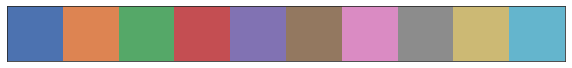

In [2]:
# Set styles 
%matplotlib inline
sns.set_style('white')
sns.set_palette('deep')

mpl.rcParams['figure.figsize'] = (16, 10)
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.linestyle'] = '--'
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.frameon'] = False 

background_color = '#f6f5f5'
col_blue = '#4c72b0'
col_orange = '#dd8452'

# Set options 
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Colour palette hex references 
pal = sns.color_palette('deep')
sns.palplot(pal)
print(pal.as_hex())

<a id = 'import'></a>
## 2.1 Importing the Data

[back to top](#toc)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/csanry/machinelearning/main/telco_churn_classification/DATA/telco-churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<a id="general"></a>

## 3. General 

**Notes from the initial familiarization of the dataset here**

* Dataset has 15 categorical variables: 
    * gender, seniorcitizen, partner, dependents
    * phonelines, internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies,
    * contract, paymentmethod, paperlessbilling
* Dataset has 3 continuous variables: tenure, monthlycharges, totalcharges
* Dataset has one unique id 'customerid' and one target variable 'churn'

[back to top](#toc)

## Variables description

#### Demographics
* 'gender': Whether the customer is a male or a female
* 'seniorcitizen': Whether the customer is a senior citizen or not (1, 0)
* 'partner': Whether the customer has a partner or not (Yes, No)
* 'dependents': Whether the customer has dependents or not (Yes, No)


#### Account Information
* 'tenure': Number of months the customer has stayed with the company
* 'contract': Length of customer's contract (Month-to-month, One year, Two year) 
* 'monthlycharges': Monthly charges of the plan 
* 'totalcharges': Total charges of the plan 
* 'paperlessbilling': Whether the customer has applied for paperless billing (Yes, No) 
* 'paymentmethod': Type of payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

#### Services
* 'phoneservice': Whether the customer has a phone service or not (Yes, No)
* 'multiplelines': Whether the customer has multiple lines (Yes, No, No phone service)


* 'internetservice': Customer’s internet service provider (DSL, Fiber optic, No)
* 'onlinesecurity': Whether the customer has online security or not (Yes, No, No internet service)
* 'onlinebackup': Whether the customer has online backup or not (Yes, No, No internet service)
* 'deviceprotection': Whether the customer has device protection or not (Yes, No, No internet service)
* 'techsupport': Whether the customer has techsupport or not (Yes, No, No internet service)
* 'streamingtv': Whether the customer has streamingtv or not (Yes, No, No internet service)
* 'streamingmovies': Whether the customer has streamingmovies or not (Yes, No, No internet service)

#### Id
* 'customerid'

#### Churn
* 'churn'

<a id="shape"></a>
## 3.1 Shape

[back to top](#toc)

In [5]:
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

Dataset has 7043 rows and 21 columns


<a id='stats'></a>

## 3.2 Statistics 

#### Observations
* Note that totalcharges is object

[back to top](#toc)

In [6]:
# Familiarization 
print(df.info())
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


<a id = 'hygiene'></a>

## 3.3 Hygiene 

#### Convert column names to lowercase

[back to top](#toc)

In [7]:
# Convert column names to lowercase
df.columns = [col.lower() for col in df.columns]

<a id='data_cleaning'></a>
## 4. Data Cleaning

#### The data cleaning step involves exploring the data and applying the 4Cs framework
1. Completing - are there any **missing values**? 
 * No missing values on first check
 * Drop: customerid, phoneservice, multiplelines
2. Correcting - are there any values that **look weird**? 
 * To check: any negative values in continuous variables? 
 * Blanks in 'totalcharges': To replace with 0s
 * To check: any duplicate values?
3. Creating - are there any features that we can **engineer** to help solve our problem?  
 * phoneservice and multiplelines: phonelines consisting of zero, one, and multiple
4. Converting - are all features in the **right dtypes?** 
 * Target: churn (convert to numeric)
 * Convert to category
    * gender, seniorcitizen, partner, dependents
    * phonelines, internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies,
    * contract, paymentmethod, paperlessbilling
 * Continuous: tenure, monthlycharges, totalcharges

[back to top](#toc)

<a id="completing"></a>
## 4.1 Completing

**Notes**

* No missing values on first check
* To consider combining variables and dropping after 

[back to top](#toc)

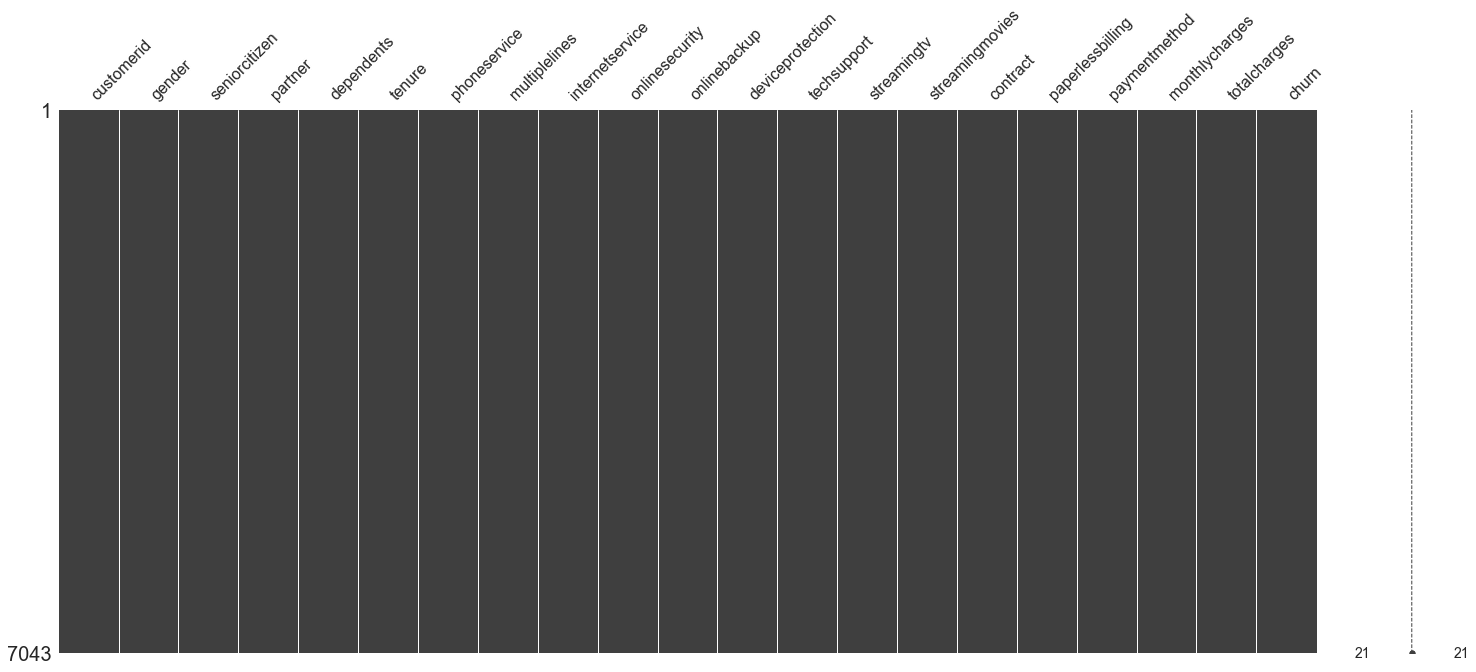

In [8]:
# get an overview of the missing values in the dataset
msno.matrix(df)
plt.show()

In [9]:
print(f'There are {df.isna().sum().sum()} total missing values in the dataset')
print(df.isna().sum())

There are 0 total missing values in the dataset
customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64


#### So far no missing values found, let's explore the totalvalue column and why it's an object

In [10]:
# totalcharges seems to be a combination of monthlycharges * tenure, more exploration when correcting data
df[['monthlycharges', 'totalcharges', 'tenure']].head()

,monthlycharges,totalcharges,tenure
0,29.85,29.85,1
1,56.95,1889.5,34
2,53.85,108.15,2
3,42.30,1840.75,45
4,70.70,151.65,2


<a id='correcting'></a>

## 4.2 Correcting 

**Notes on the dataset here**

* Expected values in the variables: negative tenures, monthly charges, total charges
* Are all customerids unique? They are 
* Duplicate values? No duplicate values

[back to top](#toc)

In [11]:
# Are customerids all unique? Yes
print(f'Number of duplicated customerids: {df["customerid"].duplicated().sum()}')

Number of duplicated customerids: 0


In [12]:
# As the dataset is small, we can quickly examine all the unique values for each variable
# for col in df.columns: 
#     print(col, '\n', df[col].unique())
#     print(df[col].value_counts())

#### Are all charges and tenures greater than 0? 

In [13]:
# cleared for tenure and monthlycharges
df[['tenure', 'monthlycharges', 'totalcharges']].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthlycharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [14]:
# totalcharges should be a numeric variable here - why is it not? 
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors = 'raise')

# Cannot convert blank value " "

ValueError: Unable to parse string " " at position 488

In [17]:
# These are most likely customers that have not paid anything yet as the tenure is still 0
df[df['totalcharges'] == ' ']

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn


In [18]:
# Strategy: replace the blanks with 0s
df.loc[df['totalcharges'] == ' ', 'totalcharges'] = 0

In [19]:
# Convert to numeric
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors = 'raise')

<a id='creating'></a>

## 4.3 Creating 

* phoneservice and multiplelines: phonelines consisting of zero, one, and multiple

[back to top](#toc)

In [20]:
df[['phoneservice', 'multiplelines']].head()

,phoneservice,multiplelines
0,No,No phone service
1,Yes,No
2,Yes,No
3,No,No phone service
4,Yes,No


In [21]:
df['multiplelines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: multiplelines, dtype: int64

In [22]:
# check that all 'No phone service' match the 'phoneservice' col values
# df.loc[df['multiplelines'] == 'No phone service', 'phoneservice'].value_counts()

df['phonelines'] = df['multiplelines'].map({'No': 'One', 
                                            'Yes': 'Multiple', 
                                            'No phone service': 'Zero'})

df['phonelines'].value_counts()

One         3390
Multiple    2971
Zero         682
Name: phonelines, dtype: int64

<a id='converting'></a>

## 4.4 Converting 

#### Variables to consider

* Target:
~churn~
* Categorical: ~gender, seniorcitizen, partner, dependents, phonelines, internetservice, onlinesecurity, onlinebackup, 
deviceprotection, techsupport, streamingtv, streamingmovies, contract, paymentmethod, paperlessbilling~

* Continuous: ~tenure, monthlycharges, totalcharges~
* Not using: ~customerid, phoneservice, multiplelines~

[back to top](#toc)

#### Mapping demographic variables as categorical data

In [23]:
cat_senior = pd.CategoricalDtype(categories = ['No', 'Yes'], ordered = False)

df['seniorcitizen'] = df['seniorcitizen'].map({0: 'No', 1: 'Yes'})
df['seniorcitizen'] = df['seniorcitizen'].astype(cat_senior)

df['gender'] = df['gender'].astype('category')
df['partner'] = df['partner'].astype('category')
df['dependents'] = df['dependents'].astype('category')

#### Converting 'phoneservice'

In [24]:
cat_phones = pd.CategoricalDtype(categories = ['Zero', 'One', 'Multiple'], ordered = False)

df['phonelines'] = df['phonelines'].astype(cat_phones)

#### Those without internetservice will not have the additional services such as deviceprotection: an extra category label is redundant here

In [25]:
# Variable 'no internet service' is redundant here
df.loc[df['internetservice'] == 'No', ['onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']] = 'No'

In [26]:
df['contract'] = df['contract'].map({'Month-to-month': 'mthly', 'Two year': '2yr', 'One year': '1yr'})

In [27]:
df['paymentmethod'] = df['paymentmethod'].map({'Electronic check': 'echeck', 
                                               'Mailed check': 'mcheck', 
                                               'Bank transfer (automatic)': 'autobank',
                                               'Credit card (automatic)': 'autocredit'})

In [28]:
remaining = ['internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paymentmethod', 'paperlessbilling']

for col in remaining:
    df[col] = df[col].astype('category')

In [29]:
# drop features that will be excluded from the model
drop_features = ['customerid', 'phoneservice', 'multiplelines']

df.drop(drop_features, axis = 1, inplace = True)

#### Create a copy of the data for visualization purposes 

In [30]:
# df copy in case 
df_vis = df.copy(deep = True) 
df_vis.sample(5)

,gender,seniorcitizen,partner,dependents,tenure,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,phonelines
6723,Male,No,No,No,46,No,No,No,No,No,No,No,2yr,No,autobank,20.05,902.00,No,One
1223,Female,No,No,No,2,Fiber optic,No,No,No,No,No,No,mthly,Yes,echeck,75.90,143.35,Yes,Multiple
4904,Female,No,No,No,33,Fiber optic,No,Yes,Yes,No,Yes,Yes,mthly,No,echeck,107.55,3645.50,No,Multiple
4939,Male,No,No,No,1,No,No,No,No,No,No,No,mthly,No,mcheck,18.90,18.90,No,One
5075,Female,No,Yes,Yes,42,Fiber optic,No,No,Yes,No,Yes,Yes,mthly,Yes,echeck,92.15,3875.40,No,One


<a id = 'eda'></a>

## 5. Exploratory Data Analysis 

#### The EDA step involves plotting and visualizing features to get a sense of the trends and patterns within the data
* Categorical features EDA - primarily using barplots, boxplots / stripplots for distributions
* Continuous features EDA - primarily using scatterplots, kdeplots for distributions


[back to top](#toc)

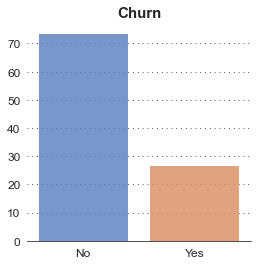

In [31]:
fig = plt.figure(figsize = (4, 4))
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])

df_chart = pd.DataFrame(df_vis['churn'].value_counts() / len(df_vis['churn']) * 100)
sns.barplot(x = df_chart.index, y = df_chart['churn'], ax = ax0, palette = 'muted', zorder = 3, edgecolor = 'black', linewidth = 0, alpha = 0.8)
ax0.grid(which = 'major', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))    
ax0.set_title('Churn', fontsize = 15, fontweight = 'bold')
ax0.set_ylabel('')

for s in ['top', 'right', 'left']:
    ax0.spines[s].set_visible(False)
    
plt.show()

In [32]:
target = 'churn'

cat_features = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phonelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 
                'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paymentmethod', 'paperlessbilling']

cont_features = ['tenure', 'monthlycharges', 'totalcharges']

<a id = 'continuous_eda'></a>

## 5.1 Continuous Features EDA
There are only three numerical columns: tenure, monthly charges and total charges. We can estimate their distributions using a kdeplot

[back to top](#toc)

#### General plot

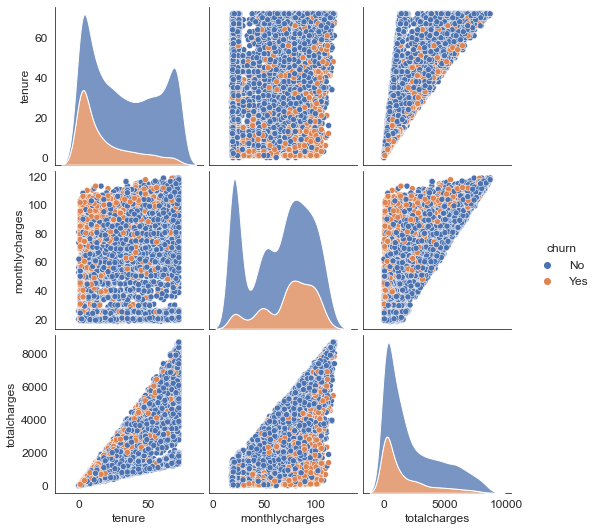

In [33]:
sns.pairplot(df_vis,
             hue = 'churn', 
             diag_kind = 'kde', diag_kws = {'shade': True, 'multiple': 'stack'})
plt.show()

#### Indepth of tenure, monthly charges 

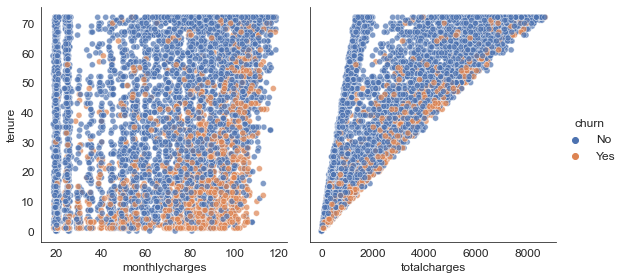

In [34]:
g = sns.PairGrid(df, x_vars = ["monthlycharges", "totalcharges"], y_vars = ["tenure"], 
                     hue = 'churn', hue_order = ['No', 'Yes'],
                     diag_sharey = True, 
                     height = 4, aspect = 1)
g.map(sns.scatterplot, alpha = 0.7)
g.add_legend()

plt.show()

#### Distribution of features

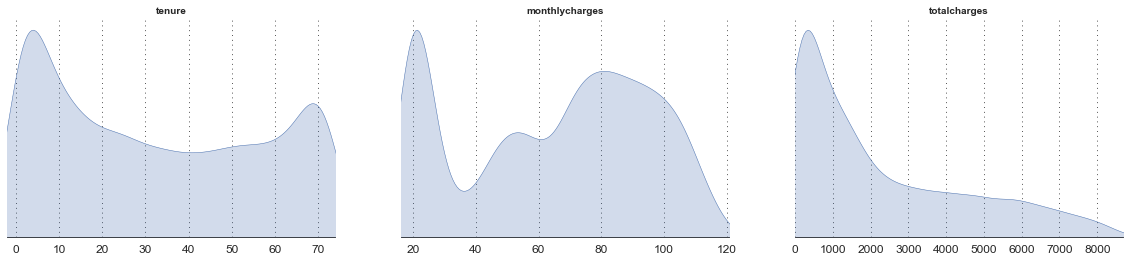

In [35]:
fig = plt.figure(figsize = (20, 4))
gs = fig.add_gridspec(1, 3)
gs.update(wspace = 0.2, hspace = 0.2)

run = 0

for row in range(1):
    for col in range(3):
        locals()[f'ax{run}'] = fig.add_subplot(gs[row, col])
        locals()[f'ax{run}'].set_yticklabels([])
        locals()[f'ax{run}'].tick_params(axis = 'y', which = 'both', length = 0)
        for s in ['top', 'right', 'left']:
            locals()[f'ax{run}'].spines[s].set_visible(False)
        run += 1

run = 0

for col in cont_features:
    sns.kdeplot(df_vis[col], ax = locals()[f'ax{run}'], shade = True, linewidth = 0.5, color = col_blue)
    locals()[f'ax{run}'].grid(which = 'major', axis = 'x', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))
    locals()[f'ax{run}'].set_title(col, fontsize = 10, fontweight = 'bold')
    locals()[f'ax{run}'].set_xlim(df[col].min() - 2, df[col].max() + 2)
    locals()[f'ax{run}'].set_xlabel('')
    locals()[f'ax{run}'].set_ylabel('')
    run += 1
    
plt.show()

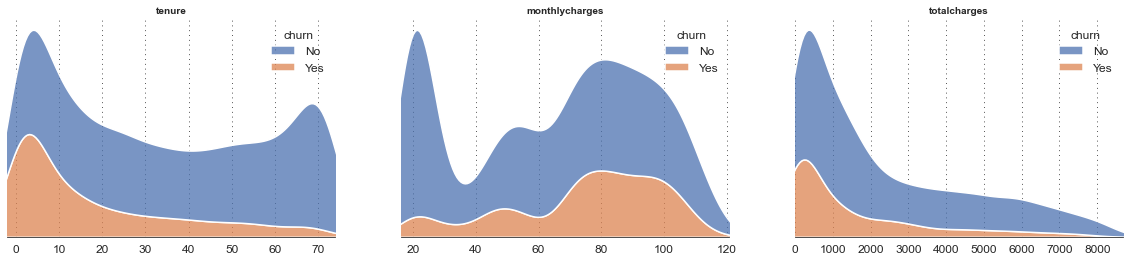

In [36]:
fig = plt.figure(figsize = (20, 4))
gs = fig.add_gridspec(1, 3)
gs.update(wspace = 0.2, hspace = 0.2)

run = 0

for row in range(1):
    for col in range(3):
        locals()[f'ax{run}'] = fig.add_subplot(gs[row, col])
        locals()[f'ax{run}'].set_yticklabels([])
        locals()[f'ax{run}'].tick_params(axis = 'y', which = 'both', length = 0)
        for s in ['top', 'right', 'left']:
            locals()[f'ax{run}'].spines[s].set_visible(False)
        run += 1

run = 0

for col in cont_features:
    sns.kdeplot(x = df_vis[col], hue = df_vis['churn'], ax = locals()[f'ax{run}'], 
                palette = 'deep', shade = True, linewidth = 1.5, linestyle = '-', multiple = 'stack')
    locals()[f'ax{run}'].grid(which = 'major', axis = 'x', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))
    locals()[f'ax{run}'].set_title(col, fontsize = 10, fontweight = 'bold')
    locals()[f'ax{run}'].set_xlim(df[col].min() - 2, df[col].max() + 2)
    locals()[f'ax{run}'].set_xlabel('')
    locals()[f'ax{run}'].set_ylabel('')
    run += 1
    
plt.show()

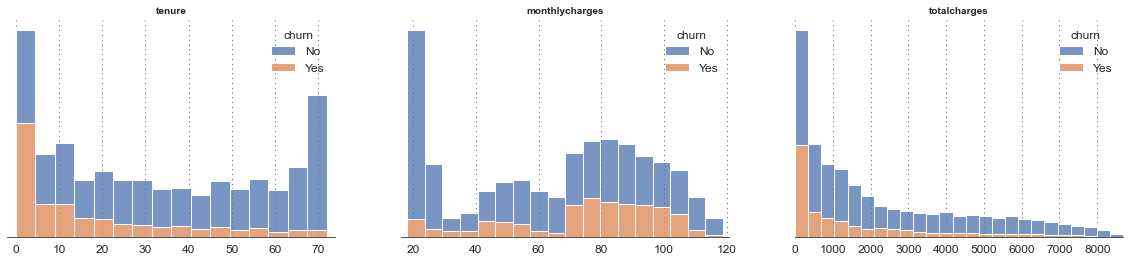

In [37]:
fig = plt.figure(figsize = (20, 4))
gs = fig.add_gridspec(1, 3)
gs.update(wspace = 0.2, hspace = 0.2)

run = 0

for row in range(1):
    for col in range(3):
        locals()[f'ax{run}'] = fig.add_subplot(gs[row, col])
        locals()[f'ax{run}'].set_yticklabels([])
        locals()[f'ax{run}'].tick_params(axis = 'y', which = 'both', length = 0)
        for s in ['top', 'right', 'left']:
            locals()[f'ax{run}'].spines[s].set_visible(False)
        run += 1

run = 0

for col in cont_features:
    sns.histplot(data = df_vis, x = col, hue = 'churn', ax = locals()[f'ax{run}'], palette = 'deep', multiple = 'stack')
    locals()[f'ax{run}'].grid(which = 'major', axis = 'x', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))
    locals()[f'ax{run}'].set_title(col, fontsize = 10, fontweight = 'bold')
    locals()[f'ax{run}'].set_xlim(df[col].min() - 2, df[col].max() + 2)
    locals()[f'ax{run}'].set_xlabel('')
    locals()[f'ax{run}'].set_ylabel('')
    run += 1
    
plt.show()

#### Observations 
* Newer customers seem to be more likely to churn 
* Customers with more expensive monthly plans are also likely to churn

<a id = 'categorical_eda'></a>

## 5.2 Categorical Features EDA

[back to top](#toc)

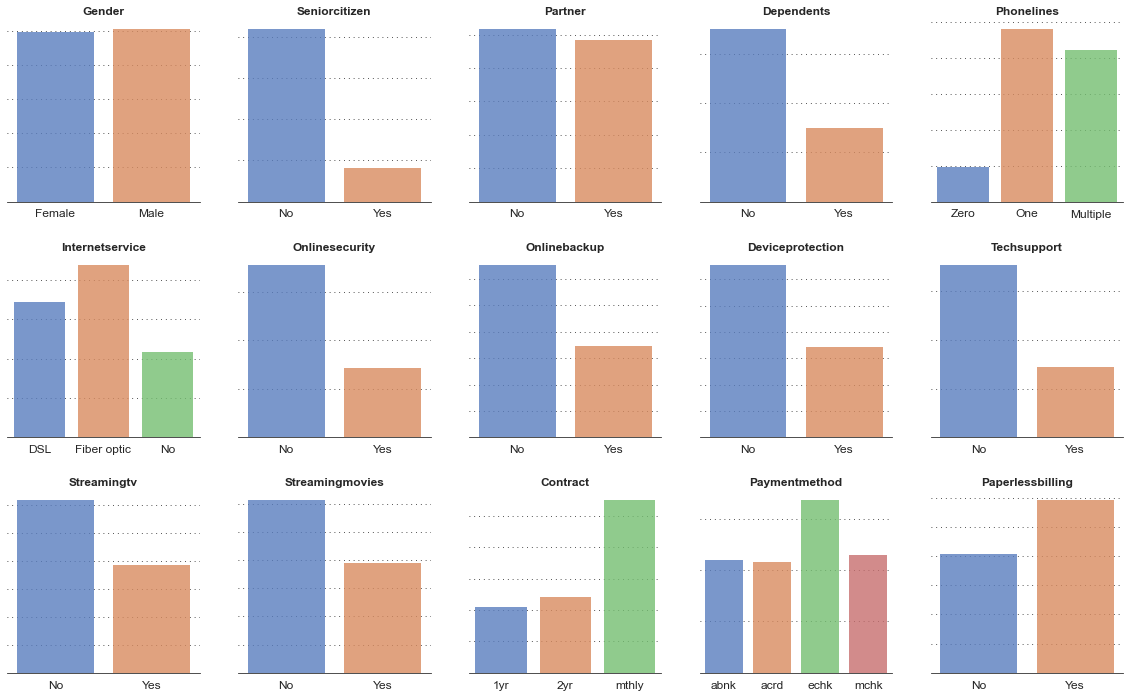

In [38]:
fig = plt.figure(figsize = (20, 12))
gs = fig.add_gridspec(3, 5)
gs.update(wspace = 0.2, hspace = 0.3)

run = 0

for row in range(3):
    for col in range(5):
        locals()[f'ax{run}'] = fig.add_subplot(gs[row, col])
        # locals()[f'ax{run}'].set_facecolor(background_color)
        locals()[f'ax{run}'].set_yticklabels([])
        locals()[f'ax{run}'].tick_params(axis = 'y', which = 'both', length = 0)
        for s in ['top', 'left', 'right']: 
            locals()[f'ax{run}'].spines[s].set_visible(False)
        run += 1

run = 0 

for col in cat_features:
    df_chart = pd.DataFrame(df_vis[col].value_counts() / len(df_vis[col]) * 100)
    sns.barplot(x = df_chart.index, y = df_chart[col], ax = locals()[f'ax{run}'], palette = 'muted', zorder = 3, edgecolor = 'black', linewidth = 0, alpha = 0.8)
    locals()[f'ax{run}'].grid(which = 'major', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))    
    locals()[f'ax{run}'].set_title(col.capitalize(), fontsize = 12, fontweight = 'bold')
    locals()[f'ax{run}'].set_ylabel('')
    run += 1
    
# shorten the labels    
locals()['ax13'].set_xticks(np.arange(4))
locals()['ax13'].set_xticklabels(labels = ['abnk', 'acrd', 'echk', 'mchk'])

plt.show()

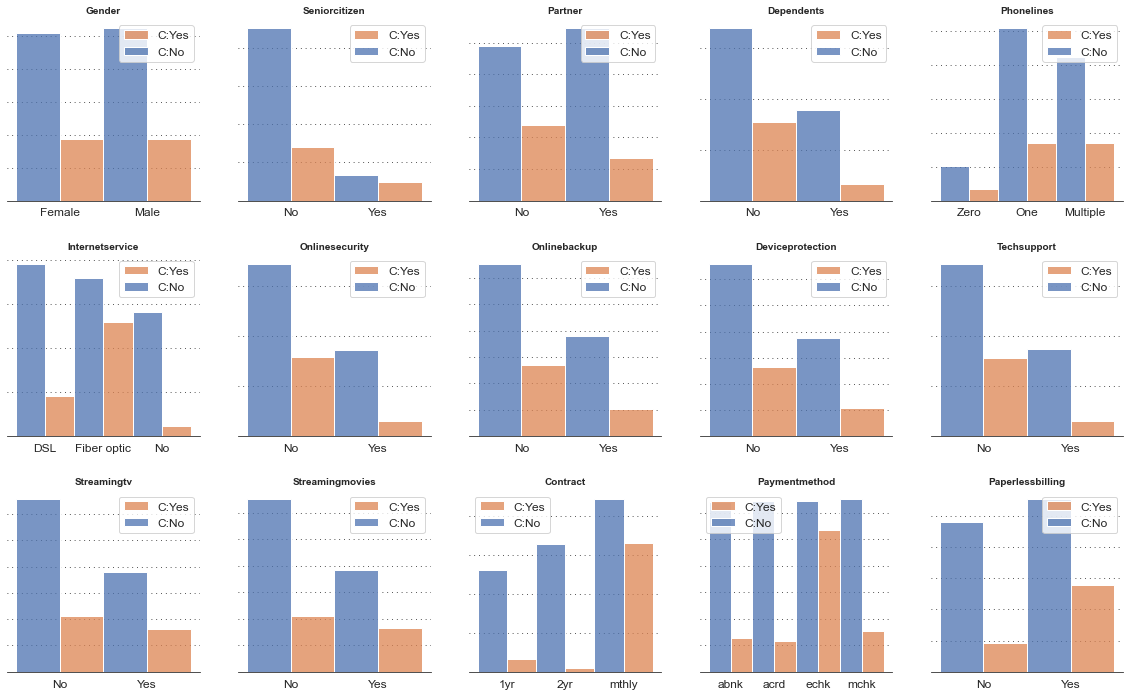

In [39]:
## dodge method for categorical type features

fig = plt.figure(figsize = (20, 12))
gs = fig.add_gridspec(3, 5)
gs.update(wspace = 0.2, hspace = 0.3)

run = 0

for row in range(3):
    for col in range(5):
        locals()[f'ax{run}'] = fig.add_subplot(gs[row, col])
        # locals()[f'ax{run}'].set_facecolor(background_color)
        locals()[f'ax{run}'].set_yticklabels([])
        locals()[f'ax{run}'].tick_params(axis = 'y', which = 'both', length = 0)
        for s in ['top', 'left', 'right']: 
            locals()[f'ax{run}'].spines[s].set_visible(False)
        run += 1

run = 0

for col in cat_features:
    sns.histplot(data = df_vis, x = col, hue = 'churn', ax = locals()[f'ax{run}'], multiple = 'dodge')
    locals()[f'ax{run}'].grid(which = 'major', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))
    locals()[f'ax{run}'].legend(labels = ['C:Yes', 'C:No'], facecolor = 'white', frameon = True)
    locals()[f'ax{run}'].set_title(col.capitalize(), fontsize = 10, fontweight = 'bold')
    locals()[f'ax{run}'].set_xlabel('')
    locals()[f'ax{run}'].set_ylabel('')
    run += 1
    
locals()['ax13'].set_xticks(np.arange(4))
locals()['ax13'].set_xticklabels(labels = ['abnk', 'acrd', 'echk', 'mchk'])

plt.show()

#### Observations 
* Customers without dependents are more likely to churn 
* Customers with Fiber optic Internet services are more likely to churn 
* Customers without tech support are more likely to churn
* Accounts without automated payments are more likely to churn
* Monthly contracts are more likely to churn

#### EDA of categorical features against monthly charges

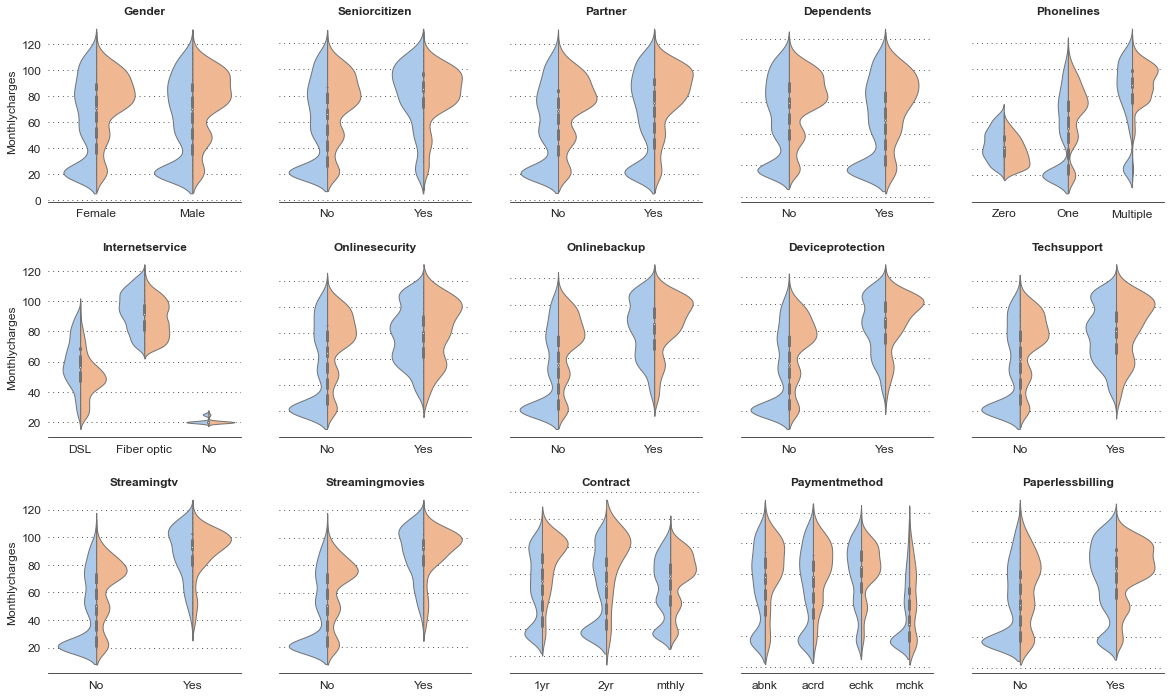

In [40]:
fig = plt.figure(figsize = (20, 12))
gs = fig.add_gridspec(3, 5)
gs.update(wspace = 0.2, hspace = 0.3)

run = 0

for row in range(3):
    for col in range(5):
        locals()[f'ax{run}'] = fig.add_subplot(gs[row, col])
        # locals()[f'ax{run}'].set_facecolor(background_color)
        
        if run not in [0, 5, 10]:
            locals()[f'ax{run}'].set_yticklabels([])
            locals()[f'ax{run}'].tick_params(axis = 'y', which = 'both', length = 0)
        
        for s in ['top', 'left', 'right']: 
            locals()[f'ax{run}'].spines[s].set_visible(False)
        
        run += 1

run = 0

for col in cat_features:
    sns.violinplot(data = df_vis, x = col, y = 'monthlycharges', hue = 'churn', ax = locals()[f'ax{run}'], split = True, palette = 'pastel')
    locals()[f'ax{run}'].grid(which = 'major', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))
    locals()[f'ax{run}'].legend('','')
    locals()[f'ax{run}'].set_title(col.capitalize(), fontsize = 12, fontweight = 'bold')
    locals()[f'ax{run}'].set_xlabel('')
    if run in [0, 5, 10]:
        locals()[f'ax{run}'].set_ylabel('Monthlycharges', fontsize = 12)
    else: locals()[f'ax{run}'].set_ylabel('')
    run += 1
    
locals()['ax13'].set_xticks(np.arange(4))
locals()['ax13'].set_xticklabels(labels = ['abnk', 'acrd', 'echk', 'mchk'])

plt.show()

#### Observations 
* Contracts with additional services tend to be slightly more expensive 
* Fiber optic is more expensive than DSL 

#### EDA of categorical features against tenure

In [ ]:
fig = plt.figure(figsize = (20, 12))
gs = fig.add_gridspec(3, 5)
gs.update(wspace = 0.2, hspace = 0.3)

run = 0

for row in range(3):
    for col in range(5):
        locals()[f'ax{run}'] = fig.add_subplot(gs[row, col])
        # locals()[f'ax{run}'].set_facecolor(background_color)
        
        if run not in [0, 5, 10]:
            locals()[f'ax{run}'].set_yticklabels([])
            locals()[f'ax{run}'].tick_params(axis = 'y', which = 'both', length = 0)
        
        for s in ['top', 'left', 'right']: 
            locals()[f'ax{run}'].spines[s].set_visible(False)
        
        run += 1

run = 0

for col in cat_features:
    sns.violinplot(data = df_vis, x = col, y = 'tenure', hue = 'churn', ax = locals()[f'ax{run}'], split = True, palette = 'pastel')
    locals()[f'ax{run}'].grid(which = 'major', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))
    locals()[f'ax{run}'].legend('','')
    locals()[f'ax{run}'].set_title(col.capitalize(), fontsize = 12, fontweight = 'bold')
    locals()[f'ax{run}'].set_xlabel('')
    if run in [0, 5, 10]:
        locals()[f'ax{run}'].set_ylabel('Tenure', fontsize = 12)
    else: locals()[f'ax{run}'].set_ylabel('')
    run += 1
    
locals()['ax13'].set_xticks(np.arange(4))
locals()['ax13'].set_xticklabels(labels = ['abnk', 'acrd', 'echk', 'mchk'])

plt.show()

#### Observations 
* There's little difference in tenure distributions between demographics

<a id = 'var_encode'></a>

## 5.3 Variable Encoding

#### The goal is to map each categorical variable into a binary variable of 0s and 1s for modelling

[back to top](#toc)

In [ ]:
for col in cat_features: 
    print(col)
    print(df[col].unique())

In [ ]:
# Encode categorical data
df_dummy = pd.get_dummies(df[cat_features], drop_first = True)
df_dummy.columns = [s.lower() for s in df_dummy.columns]

In [ ]:
# clean up / shorten column names
df_dummy.columns = ['gender_m', 'seniorcitizen', 'partner', 'dependents',
                    'phones_one', 'phones_multiple', 'internet_fiberoptic',
                    'internet_no', 'onlinesecurity', 'onlinebackup',
                    'deviceprotection', 'techsupport', 'streamingtv',
                    'streamingmovies', 'contract_2yr', 'contract_mthly',
                    'paymentmethod_autocredit', 'paymentmethod_echeck',
                    'paymentmethod_mcheck', 'paperlessbilling']

In [ ]:
# add the continuous variables 
df_dummy[['tenure', 'monthlycharges', 'totalcharges']] = df[['tenure', 'monthlycharges', 'totalcharges']]

X_features = df_dummy.columns

In [ ]:
# add the target column
df_dummy[target] = pd.get_dummies(df[target], drop_first = True)

# visualize the resulting dataset
display(df_dummy.head())

<a id = 'correlations'></a>
## 5.4 Correlations
#### Now let's look at the features and the target to see if we can identify any relationships. We start with plotting a heatmap of pairwise correlations across all variables
* Next, we can take a more indepth look at the relationships amongst demographics variables, account information, services, and churn propensity

[back to top](#toc)

## Pairwise correlations

NameError: name 'df_dummy' is not defined

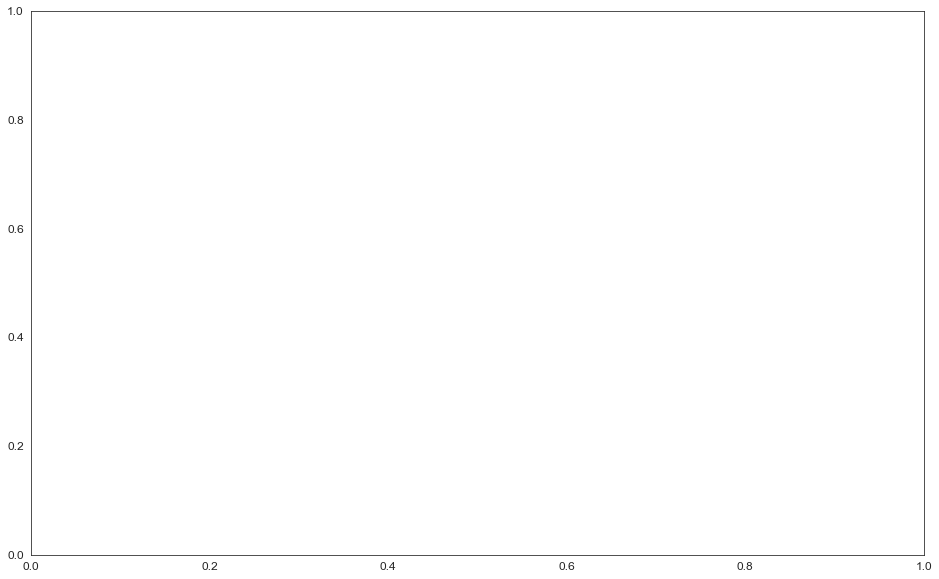

In [41]:
fig = plt.figure()
gs = fig.add_gridspec(1, 1)

ax0 = fig.add_subplot(gs[0, 0])

cmap1 = sns.diverging_palette(22, 219, s = 80, l = 55, as_cmap = True)

sns.heatmap(df_dummy.corr(), 
            ax = ax0, vmin = -1, vmax = 1, 
            annot = False, square = False, 
            cbar = True, cmap = cmap1, 
            fmt = '.1g')
ax0.set_title('Train dataset\n', fontsize = 15, fontweight = 'bold')
ax0.set_xticklabels(df_dummy.columns, rotation = 90)
# ax0.set_yticklabels(rotation = 0)

plt.show()

In [ ]:
# Indepth correlation analysis into each group of variables: split variables into respective groups

demographics = ['gender_m', 'seniorcitizen', 'partner', 'dependents', 'churn']

services = ['phones_one', 'phones_multiple', 'internet_fiberoptic',
            'internet_no', 'onlinesecurity', 'onlinebackup',
            'deviceprotection', 'techsupport', 'streamingtv',
            'streamingmovies', 'churn'] 

payment = ['contract_2yr', 'contract_mthly', 'paymentmethod_autocredit',
           'paymentmethod_echeck', 'paymentmethod_mcheck', 'paperlessbilling', 
           'tenure', 'monthlycharges', 'totalcharges', 'churn']

## Demographics and Churn

#### Observations
* Senior citizens more likely to churn
* Singles more likely to churn

In [ ]:
fig = plt.figure(figsize = (7, 7))
gs = fig.add_gridspec(1, 1)

ax0 = fig.add_subplot(gs[0, 0])

cmap1 = sns.diverging_palette(22, 219, s = 80, l = 55, as_cmap = True)

sns.heatmap(df_dummy[demographics].corr(), 
            ax = ax0, vmin = -1, vmax = 1, 
            annot = True, square = True, 
            cbar = False, cmap = cmap1, 
            fmt = '.1g')
ax0.set_title('Train dataset\n', fontsize = 15, fontweight = 'bold')
ax0.set_xticklabels(df_dummy[demographics].columns, rotation = 0)
ax0.set_yticklabels(df_dummy[demographics].columns, rotation = 0)

plt.show()

## Services and Churn

#### There are only two main services, phone and internet, but the former has many additionals like online backup and security

* Fiber optic users are more likely to churn (possibly due to the higher costs associated with the service)
* Customers without additional internet services are also more likely to churn

In [ ]:
fig = plt.figure(figsize = (8, 8))
gs = fig.add_gridspec(1, 1)

ax0 = fig.add_subplot(gs[0, 0])

cmap1 = sns.diverging_palette(22, 219, s = 80, l = 55, as_cmap = True)

sns.heatmap(df_dummy[services].corr(), 
            ax = ax0, vmin = -1, vmax = 1, 
            annot = True, square = True, 
            cbar = False, cmap = cmap1, 
            fmt = '.1g')
ax0.set_title('Train dataset\n', fontsize = 15, fontweight = 'bold')
ax0.set_xticklabels(df_dummy[services].columns, rotation = 90)
ax0.set_yticklabels(df_dummy[services].columns, rotation = 0)

plt.show()

## Account Info and Churn

#### Observations 
* Monthly contracts are more likely to churn (possibly applied for monthly service with the intention to cancel) 
* Additionally, there might be additional cancellation fees for 1 yr and 2 yr contracts
* E payments and paperless billing methods are more likely to churn

In [ ]:
fig = plt.figure(figsize = (8, 8))
gs = fig.add_gridspec(1, 1)

ax0 = fig.add_subplot(gs[0, 0])

cmap1 = sns.diverging_palette(22, 219, s = 80, l = 55, as_cmap = True)

sns.heatmap(df_dummy[payment].corr(), 
            ax = ax0, vmin = -1, vmax = 1, 
            annot = True, square = True, 
            cbar = False, cmap = cmap1, 
            fmt = '.1g')
ax0.set_title('Train dataset\n', fontsize = 15, fontweight = 'bold')
ax0.set_xticklabels(df_dummy[payment].columns, rotation = 90)
ax0.set_yticklabels(df_dummy[payment].columns, rotation = 0)

plt.show()

<a id = 'importance'></a>

## 6. Importance Scores

#### Importance scores are calculated from a predictive model that has been fit on the dataset. They provide insight into which features are the most important to the model when making a prediction. We can generate importance scores using:

* Logistic Regression - features scaled down and interpreting coefficients
* Decision Trees - importance scores output

[back to top](#toc)

<a id = 'lr'></a>
## 6.1 Logistic Regression Importance Scores

* To generate importance scores using Logistic Regression, we create a copy of the dummy dataset with scaled continuous features 
* Generate importance scores from the coefficients of a Logistic Regression after training the model on data
* The benefit of linear models is that coefficients can be interpreted as the likelihood of how each feature will add to the propensity to churn

[back to top](#toc)

In [ ]:
# create a deep copy for logistic regression modelling
df_log = df_dummy.copy(deep = True)

In [ ]:
# instantiate a MinMaxScaler object
mm_scaler = MinMaxScaler()

# transform the continuous features
df_log[cont_features] = mm_scaler.fit_transform(df_log[cont_features])

In [ ]:
#base model
lr = LogisticRegression(n_jobs = -1, random_state = 123)

# fit the model 
lr.fit(df_log[X_features], df_log[target])

# accuracy
acc_lr = lr.score(df_log[X_features], df_log[target])

In [ ]:
f_imp_lr = pd.DataFrame(data = lr.coef_[0], index = df_log[X_features].columns, columns = ['feature_importances'])
f_imp_lr.sort_values(by = 'feature_importances', inplace = True)
f_imp_lr.head()

#### Visualizing the coefficients as importance scores 

* Important features for churn: totalcharges, internet_fiberoptic, contract_mnthly
* Important features for no churn: tenure, internet_no, contract_2yr

In [ ]:
fig = plt.figure()
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])

for s in ['top', 'left', 'right']: 
    ax0.spines[s].set_visible(False)

sns.barplot(data = f_imp_lr, y = f_imp_lr.index, x = 'feature_importances', 
            ax = ax0, orient = 'h', palette = 'vlag')

# locals()[f'ax{run}'].grid(which = 'major', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))
# locals()[f'ax{run}'].legend(labels = ['', ''], facecolor = 'white', frameon = True)
ax0.set_title(f'Feature importances: Logistic Regression\n Overall Accuracy: {acc_lr:.2f}\n', fontsize = 15, fontweight = 'bold')
ax0.set_xlabel('')
ax0.set_ylabel('')

plt.show()

<a id = 'dt'></a>
## 6.2 Decision Tree Importance Scores

* Unlike a Logistic Regression, a Decision Tree does not require the features to be of the same scale
* Generate importance scores from the feature importance outputs after training the model on data
* Importance scores from the output of tree based models tell us how strongly each feature contributes to the decision, but not "which way"

[back to top](#toc)

In [ ]:
# base model 
dt = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 10, random_state = 123)

# fit the model
dt.fit(df_dummy[X_features], df_dummy[target])

# accuracy score
acc_dt = dt.score(df_dummy[X_features], df_dummy[target])

In [ ]:
f_imp_dt = pd.DataFrame(data = dt.feature_importances_, index = X_features, columns = ['feature_importances'])
f_imp_dt.sort_values(by = 'feature_importances', ascending = False, inplace = True)
f_imp_dt.head()

#### Visualizing the top ten features by feature importances

* Important features for the model: tenure, internet_fiberoptic, contract_mnthly

In [ ]:
fig = plt.figure(figsize = (10, 8))
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])

for s in ['top', 'left', 'right']: 
    ax0.spines[s].set_visible(False)

sns.barplot(data = f_imp_dt.head(10), y = f_imp_dt.index[:10], x = 'feature_importances', 
            ax = ax0, orient = 'h', palette = 'vlag')

# locals()[f'ax{run}'].grid(which = 'major', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))
# locals()[f'ax{run}'].legend(labels = ['', ''], facecolor = 'white', frameon = True)
ax0.set_title(f'Feature importances: DT\n Overall Accuracy: {acc_dt:.2f}\n', fontsize = 15, fontweight = 'bold')
ax0.set_xlabel('')
ax0.set_ylabel('')

rects = ax0.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. 
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.2f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                        # Use `label` as label
        (x_value, y_value),           # Place label at end of the bar
        xytext = (space, 0),          # Horizontally shift label by `space`
        textcoords = "offset points", # Interpret `xytext` as offset in points
        va = 'center',                # Vertically center label
        ha = ha)                      # Horizontally align label differently for
                                      # positive and negative values.

plt.show()

#### Visualizing the Decision Tree using plot_tree

In [ ]:
from sklearn import tree
plt.figure(figsize = (35,10))

_ = tree.plot_tree(dt, feature_names = X_features, filled = True, fontsize = 12, rounded = True)

plt.show()

<a id = 'modelling'></a>
## 7. Modelling

#### We can use a gradient boosted forest and random forest tree ensembles and compare their scores

* The XGBoost package will be used for both ensemble models
* XGBoost is an incredibly popular, optimized gradient-boosting ML library
* The core algorithm is parallelizable, giving speed and performance
* The GBM is selected on the basis of better generalizability (slightly better precision and recall scores)

[back to top](#toc)

#### First instantiate a shufflesplit for cross validation purposes

In [ ]:
# split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
# note: this is an alternative to train_test_split
cv_split = ShuffleSplit(n_splits = 10, test_size = 0.3, train_size = 0.6, random_state = 123)
# run model 10x with 60/30 split intentionally leaving out 10%

X, y = df_dummy[X_features], df_dummy[target]

# Instantiate a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

# Create the DMatrix from df_train and df_test: DMatrix is optimized for memory efficiency
dtrain = xgb.DMatrix(data = X_train, label = y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)

#### Create a function to generate a validation report

In [ ]:
def val_report(y_actual, y_pred, y_pred_prob):
    return '{:.4f} ROC AUC, {:.4f} accuracy, {:.4f} recall, {:.4f} precision, {:.4f} F1 score'\
            .format(roc_auc_score(y_test, y_pred_prob),
                    accuracy_score(y_test, y_pred),
                    recall_score(y_test, y_pred), 
                    precision_score(y_test, y_pred),
                    f1_score(y_test, y_pred))

<a id = 'gb'></a>

## 7.1 Gradient Boosted Model (GBM)

#### A sequential ensemble model where each predictor in the ensemble attempts to correct the errors of its predecessors (this is accomplished by training the new predictors on the residual errors of the learner before it)
* Instantiate a baseline model
* Hyperparameter tuning 

[back to top](#toc)

#### Instantiate a Gradient Boosted default model 

In [ ]:
xgb_clf = xgb.XGBClassifier(objective = 'binary:logistic', booster = 'gbtree', n_jobs = -1, random_state = 123, verbosity = 0)

# View the parameters for XGBClassifier
print(xgb_clf.get_params())

In [ ]:
# train model on training set
base = xgb_clf.fit(X_train, y_train)

# generate predicted labels and predicted probabilities
yb_pred = base.predict(X_test)
yb_pred_prob = base.predict_proba(X_test)[:, 1]

print(f'Base GB model validation: {val_report(y_test, yb_pred, yb_pred_prob)}')

#### Hyperparameter tuning of the GB ensemble

* A randomized search approach is used to tune the GB ensemble

In [ ]:
# Create the parameter grid
gbm_param_grid = {
    'learning_rate': np.arange(0.05, 0.4, 0.05),
    'max_depth': np.arange(3, 6, 1),
    'n_estimators': np.arange(50, 200, 25),
    'reg_alpha': list(np.linspace(0, 1)),
    'reg_lambda': list(np.linspace(0, 1)),
    }

# Perform RandomizedSearchCV
randomized_roc_auc = RandomizedSearchCV(estimator = xgb_clf, param_distributions = gbm_param_grid,
                                        n_iter = 15, scoring = 'roc_auc', cv = cv_split, verbose = 0, random_state = 123)

# Fit the estimator
randomized_roc_auc.fit(X, y, eval_metric = 'logloss')

# Compute metrics
print(f'{randomized_roc_auc.best_score_:.2f}')
print(randomized_roc_auc.best_estimator_)

In [ ]:
gb_best = randomized_roc_auc.best_estimator_
print(gb_best.get_params())

In [ ]:
# fit training data
gb_best.fit(X_train, y_train)

# generate predictions and predicted probabilities
y_pred = gb_best.predict(X_test)
y_pred_prob = gb_best.predict_proba(X_test)[:, 1]

print(f'Tuned GB model validation: {val_report(y_test, y_pred, y_pred_prob)}')

In [ ]:
# define function for plotting feature importances
def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    for s in ['top', 'left', 'right']:
        ax.spines[s].set_visible(False)
    
    xgb.plot_importance(booster = booster, ax = ax, grid = False)
    
    
plot_features(gb_best, (10, 12))
plt.show()

<a id = 'rf'></a>
## 7.2 Random Forest Model (RFM)

#### Averages the results of multiple learners to arrive at a single output
* Unlike a GBM, RFMs are the aggregated result of base learners
* Corrects for the tendency of a single decision tree to overfit the dataset by introducing some variability in the training of individual trees
* Each learner is trained on a different bootstrapped sample, and a subset of features are sampled at each node so that no one feature "dominates"
* The process of training a Random Forest Ensemble is conceptually similiar to that of a GBM
* We instantiate a baseline model and tune the model hyperparameters on an evaluation metric 

[back to top](#toc)

#### Instantiate a Random Forest baseline model 

In [ ]:
xgb_rf = xgb.XGBRFClassifier(objective = 'binary:logistic', booster = 'gbtree', n_jobs = -1, random_state = 123, verbosity = 0)

# View the parameters for XGBClassifier
print(xgb_rf.get_params())

In [ ]:
base_rf = xgb_rf.fit(X_train, y_train)
ybrf_pred = base_rf.predict(X_test)
ybrf_pred_prob = base_rf.predict_proba(X_test)[:, 1]

print(f'Base RF model validation: {val_report(y_test, ybrf_pred, ybrf_pred_prob)}')

#### Hyperparameter tuning of the RF ensemble

In [ ]:
# Create the parameter grid
rfm_param_grid = {
    'learning_rate': np.arange(0.8, 1.2, 0.05),
    'subsample': np.arange(0.6, 0.9, 0.1),
    'colsample_bynode': np.arange(0.6, 0.9, 0.1),
    'max_depth': np.arange(3, 10, 1),
    'n_estimators': np.arange(50, 200, 25), 
    'reg_alpha': list(np.linspace(0, 1)),
    'reg_lambda': list(np.linspace(0, 1))
    }

# Perform RandomizedSearchCV
randomized_rf_roc_auc = RandomizedSearchCV(estimator = xgb_rf, param_distributions = rfm_param_grid,
                                        n_iter = 15, scoring = 'roc_auc', cv = cv_split, verbose = 0, random_state = 123)

# Fit the estimator
randomized_rf_roc_auc.fit(X, y, eval_metric = 'logloss')

# Compute metrics
print(f'{randomized_rf_roc_auc.best_score_:.2f}')
print(randomized_rf_roc_auc.best_estimator_)

In [ ]:
rf_best = randomized_rf_roc_auc.best_estimator_
print(rf_best.get_params())

In [ ]:
# fit training data
rf_best.fit(X_train, y_train)

# generate predictions and predicted probabilities
yrf_pred = rf_best.predict(X_test)
yrf_pred_prob = rf_best.predict_proba(X_test)[:, 1]

print(f'Tuned RF model validation: {val_report(y_test, yrf_pred, yrf_pred_prob)}')

In [ ]:
plot_features(rf_best, (10, 12))
plt.show()

<a id = 'rfe'></a>
## 7.3 Random Forest Model with Feature Selection

#### As an additional step, we might want to consider dropping variables that are not important to the model in predicting churn

* Approach using the recursive feature elimination (RFE) algorithm from sklearn
* The RFE algorithm recursively trains the model on smaller feature sets by pruning the least important features at every iteration
* Variables dropped with 50% retention: gender, seniorcitizen, partners, dependents, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies, autocredit, mcheck, paperlessbilling

[back to top](#toc)

#### Feature elimination: RFE using Random Forest as the estimator

In [ ]:
# set the feature eliminator to remove one feature from each step, dropping 50% of the features in total
rf_rfe = RFE(estimator = rf_best, n_features_to_select = 0.5, 
             step = 1, verbose = 0, importance_getter = 'auto')

# fit the RFE model
rf_rfe.fit(X, y)

In [ ]:
# create a mask from the features left
mask = rf_rfe.support_

X_rfe_train = X_train.loc[:, mask]
X_rfe_test = X_test.loc[:, mask]

cols_dropped = [col for col in X.columns if col not in X_rfe_train.columns]
print(f'Columns dropped: {cols_dropped}')
print(f'Columns retained: {list(X_rfe_train.columns)}')

In [ ]:
# fit RFE training data
rf_best.fit(X_rfe_train, y_train)

# generate predictions and predicted probabilities using RFE data
yrf_rfe_pred = rf_best.predict(X_rfe_test)
yrf_rfe_pred_prob = rf_best.predict_proba(X_rfe_test)[:, 1]

print(f'Before RFE, RF model validation: {val_report(y_test, yrf_pred, yrf_pred_prob)}')
print(f'After RFE, RF model validation: {val_report(y_test, yrf_rfe_pred, yrf_rfe_pred_prob)}')

#### Visualizing Importance Scores

In [ ]:
plot_features(rf_best, (10, 12))
plt.show()

<a id = 'conclusion'></a>
## 8. Conclusion 

#### Gaining an understanding of the characteristics of churners is important for any company's retention strategy. A churn prediction model is also able to provide actionable insights and outputs to target potential churners. 

#### Closing remarks: 
* Features that are important in determining churn: onlinesecurity, fiber optic subscribers, streaming service subscribers
* Features that do not really matter: gender, seniority, dependents
* Next steps: to investigate additional features that can be used to improve model's predictive performance


[back to top](#toc)